In [1]:
import os
import requests
import nltk
nltk.download('punkt')
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
!pip install gpt-2-simple
import gpt_2_simple as gpt2

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


     |████████████████████████████████| 645kB 13.4MB/s 
  Created wheel for gpt-2-simple: filename=gpt_2_simple-0.6-cp36-none-any.whl size=25388 sha256=65622327c8aaf3c7884db8ea7cc5d0936d47b867024b8f986a7553e749c9fcec
  Stored in directory: /root/.cache/pip/wheels/cc/e7/21/4cb10bcf085ff791a08bbd03aa3fd860f6e730f37b5dbbea28
Successfully built gpt-2-simple
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
file_path = os.path.join('/content/drive/My Drive/models', 'all_revised_toms.txt')

In [0]:
with open(file_path, 'r', encoding='utf-8') as f:
    text = f.read()

In [0]:
sents = nltk.sent_tokenize(text)

In [0]:
len(sents)

423299

In [0]:
dct = defaultdict(list)
for sent in sents:
    cleaned_sent = sent.strip('.!?,»):;«(—-’ \'"́')
    dct[cleaned_sent[-4:].lower()].append(sent)
for key, value in dct.items():
    dct[key] = list(set(value))

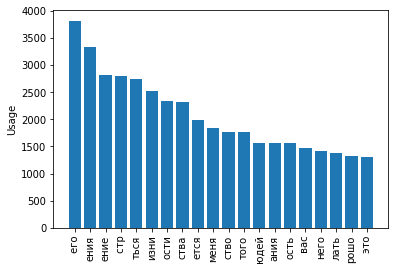

In [0]:
sorted_dct = sorted(list(dct.items()), key=lambda elem: -len(elem[1]))[:20]
y_pos = np.arange(len(sorted_dct))
plt.bar(y_pos, [len(elem[1]) for elem in sorted_dct], align='center')
plt.xticks(y_pos, [elem[0] for elem in sorted_dct], rotation=90)
plt.ylabel('Usage')
plt.show()

In [0]:
for key, value in list(dct.items()):
    if len(value) < 5:
        del dct[key]

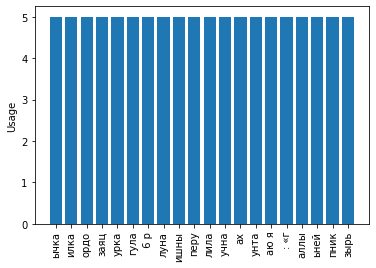

In [0]:
sorted_dct = sorted(list(dct.items()), key=lambda elem: len(elem[1]))[:20]
y_pos = np.arange(len(sorted_dct))
plt.bar(y_pos, [len(elem[1]) for elem in sorted_dct], align='center')
plt.xticks(y_pos, [elem[0] for elem in sorted_dct], rotation=90)
plt.ylabel('Usage')
plt.show()

In [0]:
pairs = []
for key, value in dct.items():
    value = sorted(value, key=lambda elem: len(elem))
    for elem1, elem2 in zip(value[0::2], value[1::2]):
        pairs.append([elem1, elem2])

In [0]:
pairs = np.array(pairs)
np.random.shuffle(pairs)

In [0]:
with open('/content/drive/My Drive/models/all_pairs.txt', 'w', encoding='utf-8') as f:
    f.write('\n'.join(['\n'.join(pair) + '\n' for pair in pairs]))

In [0]:
if not os.path.isfile(file_name):
	url = "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"
	data = requests.get(url)
	
	with open(file_name, 'w') as f:
		f.write(data.text)

GPT-2

In [0]:
model_name = "124M"
if not os.path.isdir(os.path.join("/content/drive/models", model_name)):
	print(f"Downloading {model_name} model...")
	gpt2.download_gpt2(model_name=model_name)

Fetching checkpoint: 1.05Mit [00:00, 284Mit/s]                                                      
Fetching encoder.json: 1.05Mit [00:00, 99.3Mit/s]                                                   
Fetching hparams.json: 1.05Mit [00:00, 242Mit/s]                                                    
Fetching model.ckpt.data-00000-of-00001: 498Mit [00:08, 86.8Mit/s]                                  
Fetching model.ckpt.index: 1.05Mit [00:00, 344Mit/s]                                                
Fetching model.ckpt.meta: 1.05Mit [00:00, 182Mit/s]                                                 
Fetching vocab.bpe: 1.05Mit [00:00, 189Mit/s]                                                       


In [3]:
gpt2.mount_gdrive()
tf.reset_default_graph()
sess = gpt2.start_tf_sess()
gpt2.load_gpt2(sess, run_name='run1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: ignored

In [0]:
tf.reset_default_graph()
sess = gpt2.start_tf_sess()
gpt2.finetune(sess,
              "/content/drive/My Drive/models/all_pairs.txt",
              print_every=10,
              sample_every=100,
              steps=5500)

Loading checkpoint checkpoint/run1/model-4500
INFO:tensorflow:Restoring parameters from checkpoint/run1/model-4500


  0%|          | 0/1 [00:00<?, ?it/s]

Loading dataset...


100%|██████████| 1/1 [01:55<00:00, 115.54s/it]


dataset has 35843094 tokens
Training...
Saving checkpoint/run1/model-1000
======== SAMPLE 1 ========
�естеме.

Они были видны маленьким шарфы уродовательно делали, — зачем говорил ужасный, указывая для их нужностях на всю его баршую слабую женой и т. любопытством власти большой простой и не стесняясь радостной для шнего общества.
Непродолжены ужасных солдат, сижу, солдаты, не три участых людей, думают, чтобы они обидут; не продолжая, делая себя — в древних, а простите к жинопорствому году Авраама и теряют еще не только необычайно было, но он опустил себе отнятый человек, даже 1) примирительное, что ирелое, что нужно быть ложно внимание в массе этого недоброе, для того, чтобы его соединение в относении мира, что она делает всякие источники было этим чистым знанием этого женского, безобразного масса противость для общего; он доставал, и ужасный, хлопотав морого писателями, вроде обязывал рукаверий власть или тех, которые раскаялись на отношение всё с таким же большим человеком достоины к

In [4]:
tf.reset_default_graph()
sess = gpt2.start_tf_sess()
gpt2.load_gpt2(sess)
print(gpt2.generate(sess, return_as_list=True, prefix="Все это зачем?\n")[0])

FileNotFoundError: ignored

In [0]:
gpt2.mount_gdrive()
!tar -cvf checkpoint_run3.tar checkpoint/run1/
!scp checkpoint_run3.tar '/content/drive/My Drive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
checkpoint/run1/
checkpoint/run1/counter
checkpoint/run1/encoder.json
checkpoint/run1/model-6500.index
checkpoint/run1/checkpoint
checkpoint/run1/hparams.json
checkpoint/run1/events.out.tfevents.1574523402.51c8baa5d941
checkpoint/run1/model-6500.meta
checkpoint/run1/model-6500.data-00000-of-00001
checkpoint/run1/events.out.tfevents.1574547565.51c8baa5d941
checkpoint/run1/events.out.tfevents.1574530661.51c8baa5d941
checkpoint/run1/events.out.tfevents.1574515615.ce873090aed7
checkpoint/run1/.ipynb_checkpoints/
checkpoint/run1/vocab.bpe


In [0]:
!ls drive/My\ Drive

 2017-Rutul-1.TextGrid
 7jours-141107-dico-b1-app.gdoc
 7jours-141107-dico-b1-app.pdf
'Academic Writing'
 AgrellA-Domd.xml
 all_correct_xmls_from_rusdracor_in_one_file.model
 args_preds_big.csv
'A site for Masha'
 bert
 char_rnn
 checkpoint_run2.tar
 checkpoint_run3.tar
'Colab Notebooks'
 converted_horoscopes.txt
 Convert_to_our_format.ipynb
 corewar.zip
'Cписки прошедших отбор на программу комп..-2020 учебном году (продление).xlsx'
 data
 DataBases.gdoc
'Data for a database'
'Data (Machine Learning)'
 dct.json
'Definition Modeling.gslides'
'Definition Modeling.pdf'
'DH FINAL !!!'
 DhHack_gpt.ipynb
 DhHack_torch.ipynb
 dialog.txt
'Digital Humanities'
'dracor library'
'Frame Parsing.gslides'
 francais.gdoc
 French
'?.gdoc'
 generate.py
 get_next_line.c
 get_next_line.zip
 grigorev14_essay.docx
 grigorev14_essay.gdoc
 GRU_5000.model
 History
 homework5.ipynb
 horoscopes.txt
 HW1.gdoc
 isa_parser
'La pipe de Maigret.gdoc'
 Latin
'Le Dialogue.gdoc'
'Le Hollandais ferroviaire.doc'
'Le Holla